<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import spacy
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
nlp = spacy.load("en_core_web_lg")

df = pd.read_csv('data/job_listings.csv')

In [4]:
df['parsed']= 'blank'
for i in range(len(df)):
    soup = BeautifulSoup(df['description'][i], 'html.parser')
    df['parsed'][i] = soup.get_text()
df['parsed'] = df['parsed'].apply(lambda x : x.replace('b"', ''))
df['parsed'] = df['parsed'].apply(lambda x : x.replace("b'", ''))
df['parsed'] = df['parsed'].apply(lambda x : x.replace("x99re",""))
df['parsed'] = df['parsed'].apply(lambda x : x.replace("x99ll",""))
df['parsed'] = df['parsed'].apply(lambda x : x.replace("x99s",""))
df['parsed'] = df['parsed'].apply(lambda x : x.replace("x99",""))
df['parsed'] = df['parsed'].apply(lambda x : x.replace("x9d",""))
df['parsed'] = df['parsed'].apply(lambda x : x.replace("xc2",""))
df['parsed'] = df['parsed'].apply(lambda x : x.replace("xe2",""))
df['parsed'] = df['parsed'].apply(lambda x : x.replace("xef",""))
df['parsed'] = df['parsed'].apply(lambda x : x.replace("x98",""))
df['parsed'] = df['parsed'].apply(lambda x : x.replace("x93",""))
df['parsed'] = df['parsed'].apply(lambda x : x.replace("x80",""))
df['parsed'] = df['parsed'].apply(lambda x : x.replace("x83",""))
df['parsed'] = df['parsed'].apply(lambda x : re.sub('[^a-z A-Z 0-9]', ' ', x))

C:\Python\Anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [5]:
print(df['description'][0])

b"<div><div>Job Requirements:</div><ul><li><p>\nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them</p>\n</li><li><p>Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)</p>\n</li><li><p>Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R</p>\n</li><li><p>Ability to communicate Model findings to both Technical and Non-Technical stake holders</p>\n</li><li><p>Hands on experience in SQL/Hive or similar programming language</p>\n</li><li><p>Must show past work via GitHub, Kaggle or any other published article</p>\n</li><li><p>Master's degree in Statistics/Mathematics/Computer Science or any other quant specific field.</p></li></ul><div><div><div><div><div><div>\nApply 

In [6]:
print(df['parsed'][0])

Job Requirements  nConceptual understanding in Machine Learning models like Nai  xa8ve Bayes  K Means  SVM  Apriori  Linear  Logistic Regression  Neural  Random Forests  Decision Trees  K NN along with hands on experience in at least 2 of them nIntermediate to expert level coding skills in Python R   Ability to write functions  clean and efficient data manipulation are mandatory for this role  nExposure to packages like NumPy  SciPy  Pandas  Matplotlib etc in Python or GGPlot2  dplyr  tidyR in R nAbility to communicate Model findings to both Technical and Non Technical stake holders nHands on experience in SQL Hive or similar programming language nMust show past work via GitHub  Kaggle or any other published article nMaster s degree in Statistics Mathematics Computer Science or any other quant specific field  nApply Now 


## 2) Use Spacy to tokenize the listings 

In [7]:
df['tokens']= df['parsed'].apply(lambda x: nlp.tokenizer(x))

In [8]:
type(df['tokens'][0])

spacy.tokens.doc.Doc

In [9]:
df.shape

(426, 5)

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [10]:
cv = CountVectorizer()          
dtm = cv_fit=cv.fit_transform(list(df['parsed']))
print(dtm)


  (0, 4315)	1
  (0, 7951)	1
  (0, 5468)	1
  (0, 9458)	1
  (0, 3944)	7
  (0, 4702)	1
  (0, 4505)	1
  (0, 5024)	1
  (0, 4577)	2
  (0, 5207)	1
  (0, 9992)	1
  (0, 915)	1
  (0, 4847)	1
  (0, 8974)	1
  (0, 662)	1
  (0, 4588)	1
  (0, 4644)	1
  (0, 7830)	1
  (0, 5714)	1
  (0, 7690)	1
  (0, 3266)	1
  (0, 2133)	1
  (0, 9353)	1
  (0, 6114)	1
  (0, 499)	1
  :	:
  (425, 1009)	2
  (425, 3581)	1
  (425, 6781)	1
  (425, 8233)	1
  (425, 1332)	6
  (425, 7639)	1
  (425, 5422)	1
  (425, 7422)	1
  (425, 8065)	1
  (425, 843)	1
  (425, 5752)	1
  (425, 7976)	1
  (425, 4732)	1
  (425, 6728)	1
  (425, 4272)	1
  (425, 8156)	1
  (425, 1686)	1
  (425, 6764)	1
  (425, 1674)	1
  (425, 3911)	1
  (425, 3222)	1
  (425, 8431)	1
  (425, 6702)	1
  (425, 5395)	2
  (425, 4561)	1


In [11]:
print(cv.get_feature_names())

['00', '000', '02115', '03', '0356', '04', '062', '06366', '08', '10', '100', '1000', '1001', '1008', '100k', '100x', '105', '1079302', '1082692', '10b', '10ms', '10x', '11', '110k', '112', '114157802', '12', '120', '125', '126', '130', '1315', '1324b', '138', '14', '140', '15', '150', '15000', '159m', '16', '1605', '165', '169334br', '17', '170', '17b', '18', '180', '180008jq', '18b', '19', '190', '190007ji', '19000bn4', '19000c1k', '19004162', '1901744', '1904', '1904labs', '1905', '19050', '1938', '1944', '1967', '1971', '1975', '1979', '1988', '199', '1994', '1999', '1b', '1st', '1strategy', '1tb', '20', '200', '2000', '200020183', '200041695', '2004', '2008', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2050', '21', '210', '2145', '2272', '24', '24m', '25', '250', '25256', '26', '260', '27', '28', '2nd', '2x', '30', '300', '30328', '30bn', '30k', '31', '317', '320', '3201', '33', '33051', '338', '35', '350', '3535', '35million', '36', '360', '36

## 4) Visualize the most common word counts

<AxesSubplot:>

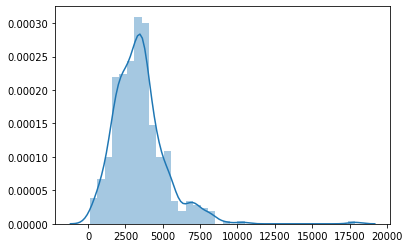

In [12]:
vect = CountVectorizer(stop_words='english', max_features=10)
data = list(df['parsed'])
#Learn our Vocab
vect.fit(data)

# Get sparse dtm
dtm = vect.transform(data)

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
doc_len = [len(doc) for doc in data]
sns.distplot(doc_len)

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [13]:
##data = list(df['parsed'])
tfidf = TfidfVectorizer(stop_words='english', max_features=500)
dtm2 = tfidf.fit_transform(data)
dtm2 = pd.DataFrame(dtm2.todense(), columns=tfidf.get_feature_names())
dtm2.sample(17)

,ability,able,access,achieve,action,actionable,ad,address,advanced,age,...,ways,work,working,workplace,world,writing,written,www,year,years
41,0.036010,0.000000,0.000000,0.000000,0.000000,0.103148,0.175742,0.000000,0.000000,0.000000,...,0.0,0.072362,0.031478,0.058921,0.000000,0.000000,0.000000,0.000000,0.000000,0.027593
139,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.125396,0.000000,0.000000,0.058085,0.000000,0.075230,0.000000,0.000000,0.047816
266,0.000000,0.097640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.060945,0.000000,0.129794,0.000000,0.000000,0.000000,0.000000,0.000000
286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.079612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
253,0.040452,0.000000,0.065432,0.063991,0.129399,0.000000,0.000000,0.000000,0.087874,0.052772,...,0.0,0.054192,0.035361,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.061993
233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.103542,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.048770
410,0.180928,0.063346,0.000000,0.000000,0.072346,0.064783,0.000000,0.000000,0.147388,0.029504,...,0.0,0.075745,0.019770,0.000000,0.000000,0.038371,0.000000,0.040755,0.000000,0.051989
333,0.075609,0.052944,0.000000,0.059804,0.000000,0.000000,0.061501,0.000000,0.123186,0.000000,...,0.0,0.050646,0.033047,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028968
125,0.059979,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.120527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.098716,0.000000
279,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.113001,0.000000,0.000000,0.104687,0.095408,0.000000,0.000000,0.000000,0.000000


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [14]:
data[0][:200]

'Job Requirements  nConceptual understanding in Machine Learning models like Nai  xa8ve Bayes  K Means  SVM  Apriori  Linear  Logistic Regression  Neural  Random Forests  Decision Trees  K NN along wit'

In [15]:
nn = NearestNeighbors(n_neighbors= 5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [16]:
nn.kneighbors([dtm.iloc[1].values])

(array([[0.        , 3.31662479, 3.74165739, 4.12310563, 4.12310563]]),
 array([[  1, 422, 417, 206, 352]], dtype=int64))

In [17]:
print(data[1][:200])
print(data[355][:200])
print(data[417][:1990])

Job Description n nAs a Data Scientist 1  you will help us build machine learning models  data pipelines  and micro services to help our clients navigate their healthcare journey  You will do so by em
 82 000 a yearThe Innovation Center at Clearwater Analytics solves significant problems with new technology and techniques  The Innovation Center explores and uses machine learning  RPA  blockchain an
About the Role    n nLogic2020 is looking to secure a Data Analyst for a pilot program with a client of ours  The program involves using true machine learning to improve customer care process  at the enterprise level  n nYou will be part of the team proving the value of machine learning in order to bring artificial intelligence into customer care and ultimately  change the way customers are served  n nAbout You    n nThis is ideal for someone who has recently moved into the data science space and understands some of the basics  Someone who is excited to learn more and grow as an individual  

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 